In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [19]:
def euler(f, t, y0, *args, **kwargs):
    """
    Eulerjeva metoda za reševanje sistema diferencialnih enačb: y' = f(t, y)
    
    :param f:  funkcija, ki vrne prvi odvod - f(t, y)
    :param t:  časovni vektor kjer računamo rešitev
    :param y0: začetna vrednosti
    :param args: dodatni argumenti funkcije f (brezimenski)
    :param kwargs: dodatni argumenti funkcije f (poimenovani)
    :return y: vrne np.array ``y`` vrednosti funkcije.
    """
    y = np.zeros_like(t)
    y[0] = y0        
    h = t[1]-t[0]
    for i in range(len(t)-1):
        y[i+1] = y[i] + f(t[i], y[i], *args, **kwargs) * h
    return y

In [20]:
def f_zračni_upor(t, y, g=9.81, m=1., c=0.5):
    return g-c*y/m

In [21]:
t = np.linspace(0, 5, 101)
t[:10]

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45])

In [22]:
sol = solve_ivp(f_zračni_upor, t_span=(t[0], t[-1]), y0=[0], t_eval=t)

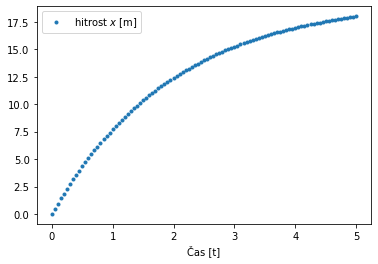

In [23]:
plt.plot(sol['t'], sol['y'][0], '.',label='hitrost $x$ [m]')
plt.xlabel('Čas [t]')
plt.legend();

In [54]:
t = np.linspace(0, 2, 4)

In [55]:
v = euler(f_zračni_upor,t, y0=0)

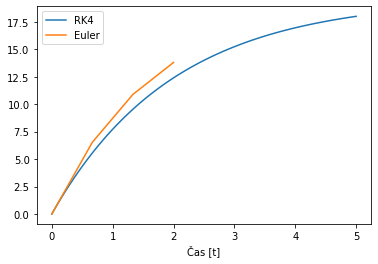

In [56]:
plt.plot(sol['t'], sol['y'][0], '-',label='RK4')
plt.plot(t, v, '-',label='Euler')
plt.xlabel('Čas [t]')
plt.legend();

In [57]:
from scipy.optimize import newton

V kodi komentiram kateri del bi bilo dobro posebej izpostaviti.

In [64]:
def sekantna(fun, x0, x1, tol=1e-3, Dtol=1e-1, max_iter=5, izpis=True):
    """ Vrne ničlo z natančnostjo tol
    
    :param fun: funkcija katere ničlo iščemo
    :param x0:  spodnja meja iskanja
    :param x1:  zgornja meja iskanja
    :param tol: zahtevana natančnost
    :max_iter:  maksimalno število iteracij preden se izvajanje prekine
    :param Dtol:največja vsota absolutnih vrednosti rešitve 
    :izpis:     ali na koncu izpiše kratko poročilo
    """
    for i in range(max_iter):
        f0 = fun(x0)
        f1 = fun(x1)
        x2 = x1 - f1 * (x1 - x0)/(f1 - f0)
        if izpis:
            print(f'{i+1:g}. korak: x0={x0:g}, f(x0)={f0:g}, x1={x1:g}, f(x1)={f1:g}, x2={x2:g}.')
        x0 = x1
        x1 = x2        
        if np.abs(x1-x0)<tol:
            r = (x0+x1)/2
            D = np.abs(fun(x0)) + np.abs(fun(x1))
            if D > Dtol:
                raise Exception('Verjetnost pola ali več ničel.')
            r = (x0+x1)/2
            if izpis:
                decimalk = int(np.log10(1/tol)) # ne deluje vedno in za vse primere:)    
                print(f'Rešitev: {r:5.{decimalk}f}, D: {D:5.5f}')
            return r 

!!!! GAŠPER TUKAJ GLEJTE!!!

In [65]:
def euler_implicitna(f, t, y0, *args, **kwargs):
    """
    Implicitna Eulerjeva metoda za reševanje sistema diferencialnih enačb: y' = f(t, y)
    
    :param f:  funkcija, ki vrne prvi odvod - f(t, y)
    :param t:  časovni vektor kjer računamo rešitev
    :param y0: začetna vrednosti
    :param args: dodatni argumenti funkcije f (brezimenski)
    :param kwargs: dodatni argumenti funkcije f (poimenovani)
    :return y: vrne np.array ``y`` vrednosti funkcije.
    """
    y = np.zeros_like(t)
    y[0] = y0        
    h = t[1]-t[0]
    for i in range(len(t)-1):
        ### GAŠPER: Ta del bi bilo dobro, da bi animirali
        #sol = newton(lambda y_next: y[i] + f(t[i], y_next, *args, **kwargs) * h - y_next, x0=y[0])
        y[i+1] = sekantna(lambda y_next: y[i] + f(t[i], y_next, *args, **kwargs) * h - y_next, x0=y[i],x1=y[i]+1)
    return y

In [66]:
vi = euler_implicitna(f_zračni_upor,t, y0=0)

1. korak: x0=0, f(x0)=6.54, x1=1, f(x1)=5.20667, x2=4.905.
2. korak: x0=1, f(x0)=5.20667, x1=4.905, f(x1)=-1.77636e-15, x2=4.905.
Rešitev: 4.905, D: 0.00000
1. korak: x0=4.905, f(x0)=4.905, x1=5.905, f(x1)=3.57167, x2=8.58375.
2. korak: x0=5.905, f(x0)=3.57167, x1=8.58375, f(x1)=3.55271e-15, x2=8.58375.
Rešitev: 8.584, D: 0.00000
1. korak: x0=8.58375, f(x0)=3.67875, x1=9.58375, f(x1)=2.34542, x2=11.3428.
2. korak: x0=9.58375, f(x0)=2.34542, x1=11.3428, f(x1)=-3.55271e-15, x2=11.3428.
Rešitev: 11.343, D: 0.00000


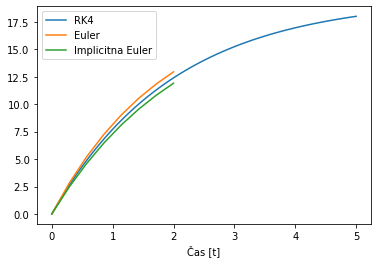

In [49]:
plt.plot(sol['t'], sol['y'][0], '-',label='RK4')
plt.plot(t, v, '-',label='Euler')
plt.plot(t, vi, '-',label='Implicitna Euler')
plt.xlabel('Čas [t]')
plt.legend();

Potem, ko bi bil en korak animiran in pojasnjen, bi pokazali več korakov..

In [63]:
t = np.linspace(0, 20, 101)
t[:10]

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8])

In [64]:
sol = solve_ivp(f_zračni_upor, t_span=(t[0], t[-1]), y0=[0], t_eval=t)

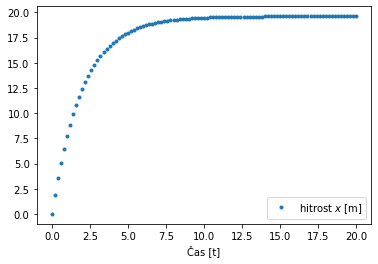

In [65]:
plt.plot(sol['t'], sol['y'][0], '.',label='hitrost $x$ [m]')
plt.xlabel('Čas [t]')
plt.legend();

In [66]:
t = np.linspace(0, 20, 8)

In [67]:
v = euler(f_zračni_upor,t, y0=0)

In [70]:
vi = euler_implicitna(f_zračni_upor,t, y0=0)

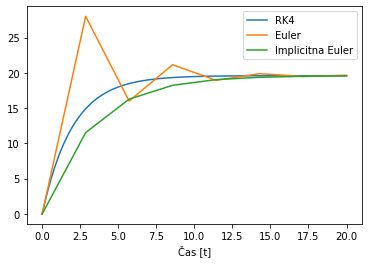

In [71]:
plt.plot(sol['t'], sol['y'][0], '-',label='RK4')
plt.plot(t, v, '-',label='Euler')
plt.plot(t, vi, '-',label='Implicitna Euler')
plt.xlabel('Čas [t]')
plt.legend();

Dodatek za animacijo

In [ ]:
def sekantna(fun, x0, x1, tol=1e-3, Dtol=1e-1, max_iter=50, izpis=True):
    """ Vrne ničlo z natančnostjo tol
    
    :param fun: funkcija katere ničlo iščemo
    :param x0:  spodnja meja iskanja
    :param x1:  zgornja meja iskanja
    :param tol: zahtevana natančnost
    :max_iter:  maksimalno število iteracij preden se izvajanje prekine
    :param Dtol:največja vsota absolutnih vrednosti rešitve 
    :izpis:     ali na koncu izpiše kratko poročilo
    """
    if np.sign(fun(x0))==np.sign(fun(x1)):
        raise Exception('Ničla ni izolirana. Root is not bracketed.')
    for i in range(max_iter):
        f0 = fun(x0)
        f1 = fun(x1)
        x2 = x1 - f1 * (x1 - x0)/(f1 - f0)
        x0 = x1
        x1 = x2
        if izpis:
            print('{:g}. korak: x0={:g}, x1={:g}.'.format(i+1, x0, x1))
        if np.abs(x1-x0)<tol:
            r = (x0+x1)/2
            D = np.abs(fun(x0)) + np.abs(fun(x1))
            if D > Dtol:
                raise Exception('Verjetnost pola ali več ničel.')
            r = (x0+x1)/2
            if izpis:
                decimalk = int(np.log10(1/tol)) # ne deluje vedno in za vse primere:)    
                print(f'Rešitev: {r:5.{decimalk}f}, D: {D:5.5f}')
            return r 